### Importation des bibliothèques

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from tensorflow import keras

### Vérification des l'import de tensorflow et keras
- Dans les nouvelles versions de TensorFlow, Keras est intégré directement dans TensorFlow en tant que module tf.keras. Cela signifie que vous pouvez importer Keras directement à partir de TensorFlow sans avoir à installer Keras séparément.

In [2]:
import tensorflow as tf
from tensorflow import keras

print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")

# Vérifier si Keras est intégré à TensorFlow
print(f"Keras est intégré à TensorFlow : {keras == tf.keras}")

# Vérifier si Keras utilise le backend TensorFlow
print(f"Keras utilise le backend TensorFlow : {keras.backend.backend() == 'tensorflow'}")

# Vérifier si TensorFlow utilise le backend TensorFlow
print(f"TensorFlow utilise le backend TensorFlow : {tf.keras.backend.backend() == 'tensorflow'}")

TensorFlow version: 2.18.0
Keras version: 3.8.0
Keras est intégré à TensorFlow : True
Keras utilise le backend TensorFlow : True
TensorFlow utilise le backend TensorFlow : True


### Vérification de la disponibilité du GPU

In [3]:
import torch

# Vérifier si un GPU est disponible
if torch.cuda.is_available():
    print("GPU disponible :", torch.cuda.get_device_name(0))
    print("PyTorch utilise CUDA :", torch.cuda.is_available())
    print("Nombre de GPUs disponibles :", torch.cuda.device_count())
else:
    print("GPU non disponible. PyTorch utilise uniquement le CPU.")

# Optionnel : vérifier le périphérique actuellement utilisé
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Périphérique actif :", device)

GPU disponible : NVIDIA GeForce RTX 2060
PyTorch utilise CUDA : True
Nombre de GPUs disponibles : 1
Périphérique actif : cuda


### Verification de la disponibilité du GPU pour les calculs PyTorch    

In [4]:
import torch
import time

# Génération de données aléatoires pour tester
data_size = 10000  # Taille des matrices
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Création de deux matrices sur le GPU ou CPU selon la disponibilité
a = torch.rand(data_size, data_size, device=device)
b = torch.rand(data_size, data_size, device=device)

# Vérification que les données sont bien sur le GPU ou CPU
print(f"Device de 'a' : {a.device}")
print(f"Device de 'b' : {b.device}")

# Mesurer le temps de calcul pour une multiplication matricielle
start_time = time.time()
result = torch.mm(a, b)  # Multiplication matricielle
end_time = time.time()

print("Calcul terminé.")
print(f"Durée du calcul : {end_time - start_time:.4f} secondes.")

Device de 'a' : cuda:0
Device de 'b' : cuda:0
Calcul terminé.
Durée du calcul : 0.2390 secondes.


### EDA data
Il y a 2 dossiers :
- **leftImg8bit** : contient les images RGB d'origine
- **gtFine** : contient les masques de la segmentation d'images 

In [5]:
import os
import pandas as pd
from collections import defaultdict

# Chemins des dossiers
leftImg8bit_path = 'data/leftImg8bit/'
gtFine_path = 'data/gtFine/'

# Fonction pour récupérer les statistiques globales du dataset
def analyser_dataset(dossier):
    statistiques = {
        "total_images": 0,
        "total_label_ids": 0,
        "total_autres_fichiers": 0,
        "images_details": [],
        "label_ids_details": []
    }

    for root, dirs, files in os.walk(dossier):
        for file in files:
            extension = os.path.splitext(file)[1].lower()
            file_path = os.path.join(root, file)
            
            if extension == ".png" and "labelIds" in file:
                statistiques["total_label_ids"] += 1
                statistiques["label_ids_details"].append({
                    "Dossier": root,
                    "Fichier": file
                })
            elif extension == ".png":
                statistiques["total_images"] += 1
                statistiques["images_details"].append({
                    "Dossier": root,
                    "Fichier": file
                })
            else:
                statistiques["total_autres_fichiers"] += 1

    return statistiques

# Analyse des deux dossiers
statistiques_leftImg8bit = analyser_dataset(leftImg8bit_path)
statistiques_gtFine = analyser_dataset(gtFine_path)

# Construire les conclusions
conclusions = f"""
JEU DE DONNÉES
Le jeu de données est composé de 2 dossiers:
● leftImg8bit : ce dossier contient les images RGB d’origine. Ce sont les données d’entrée.
    - Nombre total d’images : {statistiques_leftImg8bit['total_images']}
● gtFine : ce dossier contient les masques de segmentation. Ce sont les données de sortie.
    - Nombre total de masques 'labelIds' : {statistiques_gtFine['total_label_ids']}
    - Nombre total d’autres fichiers : {statistiques_gtFine['total_autres_fichiers']}
Les données d’entrée sont des images de 2048 x 1024 pixels sur 3 canaux (RGB).
En ce qui concerne les données de sortie, seuls les fichiers se terminant par '_labelIds.png'
sont intéressants. Ce sont les masques correspondant aux images RGB.

Le dataset est séparé en 3 parties :
● Jeu de test : {len([d for d in statistiques_leftImg8bit['images_details'] if 'test' in d['Dossier']])} images
● Jeu d’entraînement : {len([d for d in statistiques_leftImg8bit['images_details'] if 'train' in d['Dossier']])} images
● Jeu de validation : {len([d for d in statistiques_leftImg8bit['images_details'] if 'val' in d['Dossier']])} images
"""

# Afficher les conclusions
print(conclusions)

# Exporter les détails dans des fichiers CSV pour une analyse approfondie si nécessaire
pd.DataFrame(statistiques_leftImg8bit["images_details"]).to_csv("images_leftImg8bit.csv", index=False)
pd.DataFrame(statistiques_gtFine["label_ids_details"]).to_csv("labelIds_gtFine.csv", index=False)



JEU DE DONNÉES
Le jeu de données est composé de 2 dossiers:
● leftImg8bit : ce dossier contient les images RGB d’origine. Ce sont les données d’entrée.
    - Nombre total d’images : 5000
● gtFine : ce dossier contient les masques de segmentation. Ce sont les données de sortie.
    - Nombre total de masques 'labelIds' : 4628
    - Nombre total d’autres fichiers : 4639
Les données d’entrée sont des images de 2048 x 1024 pixels sur 3 canaux (RGB).
En ce qui concerne les données de sortie, seuls les fichiers se terminant par '_labelIds.png'
sont intéressants. Ce sont les masques correspondant aux images RGB.

Le dataset est séparé en 3 parties :
● Jeu de test : 1525 images
● Jeu d’entraînement : 2975 images
● Jeu de validation : 500 images



### Exemple image RGB d'origine

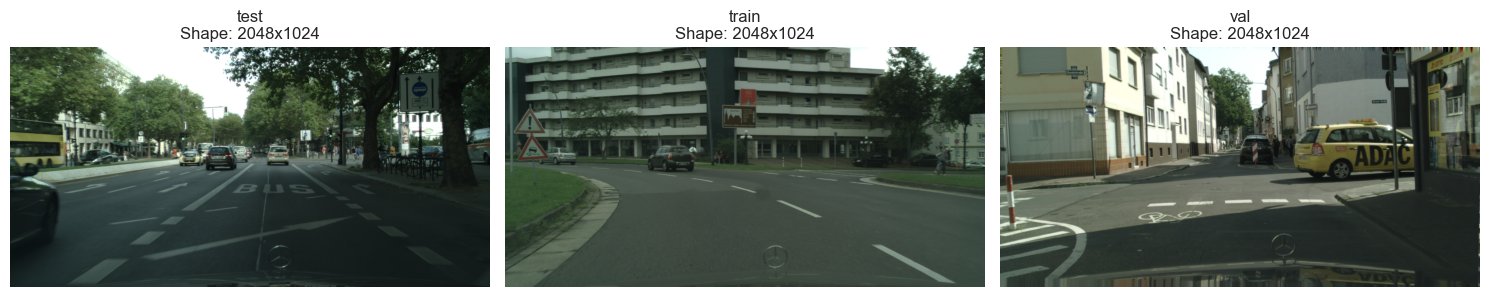

In [6]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Chemin vers le dossier leftImg8bit
leftImg8bit_path = 'data/leftImg8bit/'

# Fonction pour afficher des exemples d'images
def afficher_exemples_images(dossier_principal):
    sous_dossiers = ["test", "train", "val"]
    fig, axes = plt.subplots(1, len(sous_dossiers), figsize=(15, 5))

    for i, sous_dossier in enumerate(sous_dossiers):
        dossier = os.path.join(dossier_principal, sous_dossier)
        
        # Trouver une image dans le sous-dossier
        example_image_path = None
        for root, dirs, files in os.walk(dossier):
            for file in files:
                if file.endswith(".png"):  # Vérifier les fichiers PNG
                    example_image_path = os.path.join(root, file)
                    break
            if example_image_path:
                break
        
        if example_image_path:
            # Charger l'image et obtenir sa shape
            image = Image.open(example_image_path)
            axes[i].imshow(image)
            axes[i].axis("off")
            axes[i].set_title(f"{sous_dossier}\nShape: {image.size[0]}x{image.size[1]}")
        else:
            axes[i].set_title(f"{sous_dossier}\nAucune image trouvée")
            axes[i].axis("off")

    plt.tight_layout()
    plt.show()

# Appeler la fonction pour afficher les exemples
afficher_exemples_images(leftImg8bit_path)


Associations dans test :
  - Image berlin_000000_000019_gtFine:
    - berlin_000000_000019_gtFine_color.png
    - berlin_000000_000019_gtFine_instanceIds.png
    - berlin_000000_000019_gtFine_labelIds.png
    - berlin_000000_000019_gtFine_polygons.json


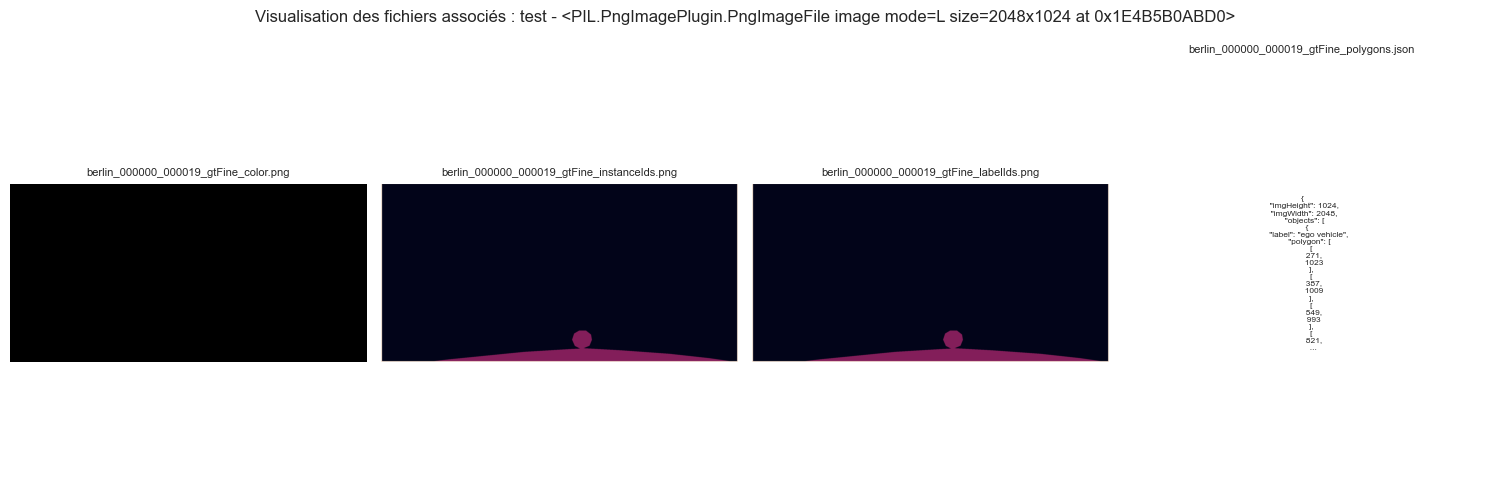

Associations dans train :
  - Image aachen_000000_000019_gtFine:
    - aachen_000000_000019_gtFine_color.png
    - aachen_000000_000019_gtFine_instanceIds.png
    - aachen_000000_000019_gtFine_labelIds.png
    - aachen_000000_000019_gtFine_polygons.json


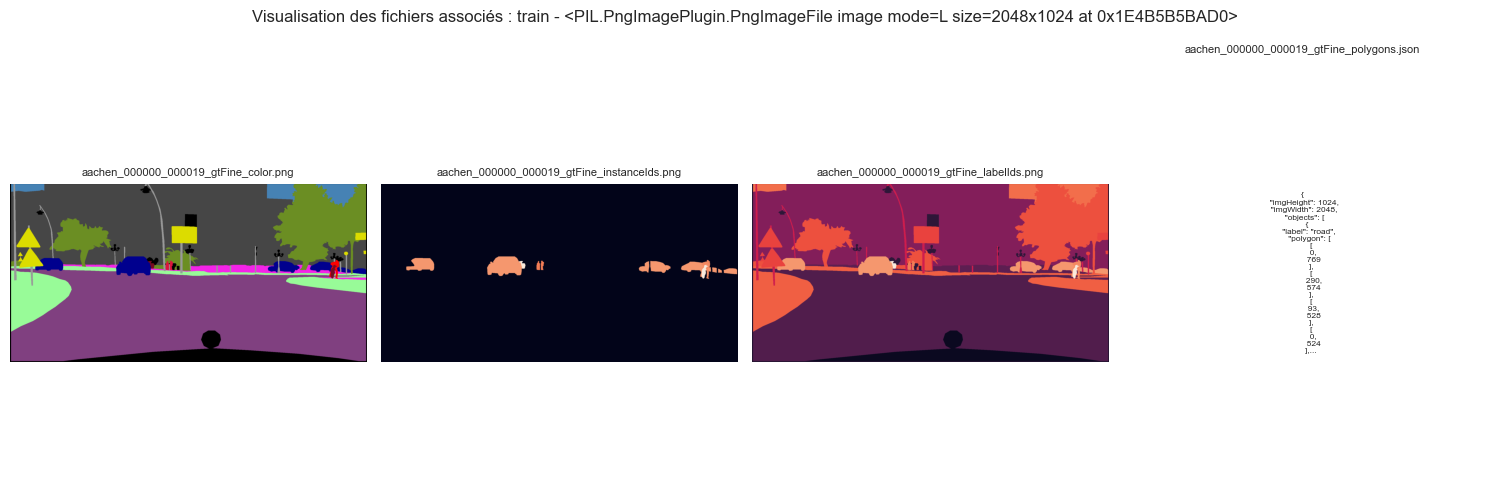

Associations dans val :
  - Image frankfurt_000000_000294_gtFine:
    - frankfurt_000000_000294_gtFine_color.png
    - frankfurt_000000_000294_gtFine_instanceIds.png
    - frankfurt_000000_000294_gtFine_labelIds.png
    - frankfurt_000000_000294_gtFine_polygons.json


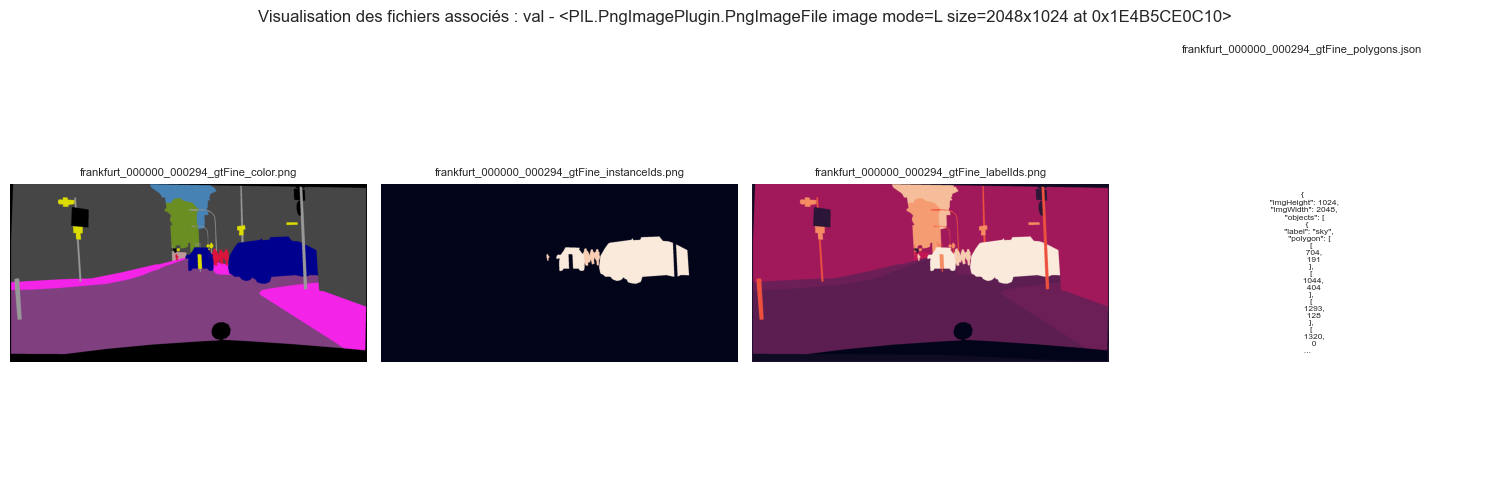

In [7]:
import os
import json
from collections import defaultdict
from PIL import Image
import matplotlib.pyplot as plt

# Chemin vers le dossier gtFine
gtFine_path = 'data/gtFine/'

# Fonction pour analyser les fichiers par image
def analyser_fichiers_et_associations(dossier_principal):
    statistiques = {}

    for sous_dossier in ["test", "train", "val"]:
        chemin_sous_dossier = os.path.join(dossier_principal, sous_dossier)
        fichiers_par_image = defaultdict(list)
        types_de_fichiers = defaultdict(int)

        # Parcourir les fichiers du sous-dossier
        for root, dirs, files in os.walk(chemin_sous_dossier):
            for file in files:
                extension = os.path.splitext(file)[1].lower()
                base_name = "_".join(file.split("_")[:-1])  # Identifier le groupe d'une image (numérotation)
                fichiers_par_image[base_name].append(os.path.join(root, file))
                types_de_fichiers[extension] += 1

        statistiques[sous_dossier] = {
            "types_de_fichiers": dict(types_de_fichiers),
            "fichiers_par_image": dict(fichiers_par_image)
        }

    return statistiques

# Fonction pour afficher et visualiser les fichiers associés
def afficher_exemples_et_visualisations(statistiques):
    for sous_dossier, data in statistiques.items():
        fichiers_par_image = data["fichiers_par_image"]

        print(f"Associations dans {sous_dossier} :")
        
        # Limité à 1 image pour visualisation complète dans chaque sous-dossier
        for image, fichiers in list(fichiers_par_image.items())[:1]:
            print(f"  - Image {image}:")
            for fichier in fichiers:
                print(f"    - {os.path.basename(fichier)}")

            # Visualiser les fichiers associés
            fig, axes = plt.subplots(1, len(fichiers), figsize=(15, 5))
            for idx, fichier in enumerate(fichiers):
                if fichier.endswith(".png"):  # Afficher les images PNG
                    image = Image.open(fichier)
                    axes[idx].imshow(image)
                    axes[idx].axis("off")
                    axes[idx].set_title(os.path.basename(fichier), fontsize=8)
                elif fichier.endswith(".json"):  # Lire et afficher un extrait du JSON
                    with open(fichier, 'r') as f:
                        json_content = json.load(f)
                        extrait = json.dumps(json_content, indent=2)[:300] + "..."
                    axes[idx].text(0.5, 0.5, extrait, fontsize=6, wrap=True, ha='center', va='center')
                    axes[idx].axis("off")
                    axes[idx].set_title(os.path.basename(fichier), fontsize=8)
                else:
                    axes[idx].axis("off")
                    axes[idx].set_title(f"{os.path.basename(fichier)}\n(non visualisable)", fontsize=8)

            plt.suptitle(f"Visualisation des fichiers associés : {sous_dossier} - {image}")
            plt.tight_layout()
            plt.show()

# Analyser les fichiers et visualiser
statistiques_gtFine = analyser_fichiers_et_associations(gtFine_path)
afficher_exemples_et_visualisations(statistiques_gtFine)


### Analyse des données et utilisation des fichiers

#### Données d'entrée : `leftImg8bit_path`
- Les données d’entrée sont situées dans le dossier `leftImg8bit`.
- Ce dossier contient les **images RGB originales**, qui sont les données d’entrée pour l’entraînement du modèle.
- **Caractéristiques des images d’entrée** :
  - Résolution : **2048 x 1024 pixels**.
  - Canaux : **3 canaux (RGB)**.
- Ces images représentent l'environnement que le modèle doit analyser et segmenter.

---

### Données de sortie : `gtFine_path`
- Les données de sortie sont situées dans le dossier `gtFine`.
- Ce dossier contient plusieurs types de fichiers, mais nous nous intéressons uniquement aux fichiers dont le nom se termine par `*_labelIds.png`.

#### Fichiers `*_labelIds.png` :
- Ce sont les **masques d'annotation** pour la segmentation.
- Chaque pixel du masque a une valeur correspondant à l'**identifiant d'une classe** (par exemple, route, voiture, trottoir, etc.).
- **Caractéristiques des fichiers `*_labelIds.png`** :
  - Les valeurs des pixels indiquent les identifiants des labels de segmentation.
  - Il existe **32 catégories différentes** à mapper vers **8 catégories principales** pour simplifier le problème.

#### Autres fichiers dans `gtFine` :
Bien que nous ne les utilisions pas dans ce cas précis, voici les autres types de fichiers présents :
- **`*_polygons.json`** :
  - Contiennent des métadonnées descriptives pour chaque objet (par exemple, catégories et polygones de segmentation).
- **`*_color.png`** :
  - Représentations visuelles des masques, où chaque classe est représentée par une couleur unique.
- **`*_instanceIds.png`** :
  - Identifiants uniques pour chaque instance d'objet dans les images (utile pour la segmentation d'instances).

---

### Structure du dataset

- Le dataset est séparé en **3 parties** :
  1. **Jeu de test** : **1525 images**.
  2. **Jeu d’entraînement** : **2975 images**.
  3. **Jeu de validation** : **500 images**.

Chaque partie est organisée de la manière suivante :
- Les images d’entrée sont situées dans le dossier `leftImg8bit/test`, `leftImg8bit/train`, ou `leftImg8bit/val`.
- Les masques d’annotation (données de sortie) sont situés dans `gtFine/test`, `gtFine/train`, ou `gtFine/val`.

---

### Résumé

| Type de données          | Chemin                | Description                                                                            |
|--------------------------|-----------------------|----------------------------------------------------------------------------------------|
| **Images d’entrée**      | `leftImg8bit_path`   | Images RGB (2048 x 1024, 3 canaux).                                                   |
| **Masques d’annotation** | `gtFine_path`        | Fichiers `*_labelIds.png` : identifiants des labels pour chaque pixel.                |
| **Jeu de test**          | `test`              | Contient 1525 images et leurs masques associés.                                       |
| **Jeu d’entraînement**   | `train`             | Contient 2975 images et leurs masques associés.                                       |
| **Jeu de validation**    | `val`               | Contient 500 images et leurs masques associés.                                        |

---

### Utilisation pour l'entraînement

- **Données d’entrée** : Les images RGB du dossier `leftImg8bit`.
- **Données de sortie** : Les masques `*_labelIds.png` du dossier `gtFine`.

Ces deux ensembles de données permettront d'entraîner un modèle de segmentation capable d'identifier et de classer chaque pixel dans l'image en fonction des 8 catégories principales définies.

In [8]:
import os

train_path = 'data/gtFine/train/'
print("Fichiers disponibles dans le dossier train :")
print(os.listdir(train_path))


Fichiers disponibles dans le dossier train :
['aachen', 'bochum', 'bremen', 'cologne', 'darmstadt', 'dusseldorf', 'erfurt', 'hamburg', 'hanover', 'jena', 'krefeld', 'monchengladbach', 'strasbourg', 'stuttgart', 'tubingen', 'ulm', 'weimar', 'zurich']


Shape du masque : (1024, 2048)
Valeurs uniques dans le masque : [ 0  1  3  4  7  8 11 17 20 21 22 23 24 25 26 33]
Portion du masque (200x250) :
 [[7 7 7 ... 7 7 7]
 [7 7 7 ... 7 7 7]
 [7 7 7 ... 7 7 7]
 ...
 [7 7 7 ... 7 7 7]
 [7 7 7 ... 7 7 7]
 [7 7 7 ... 7 7 7]]


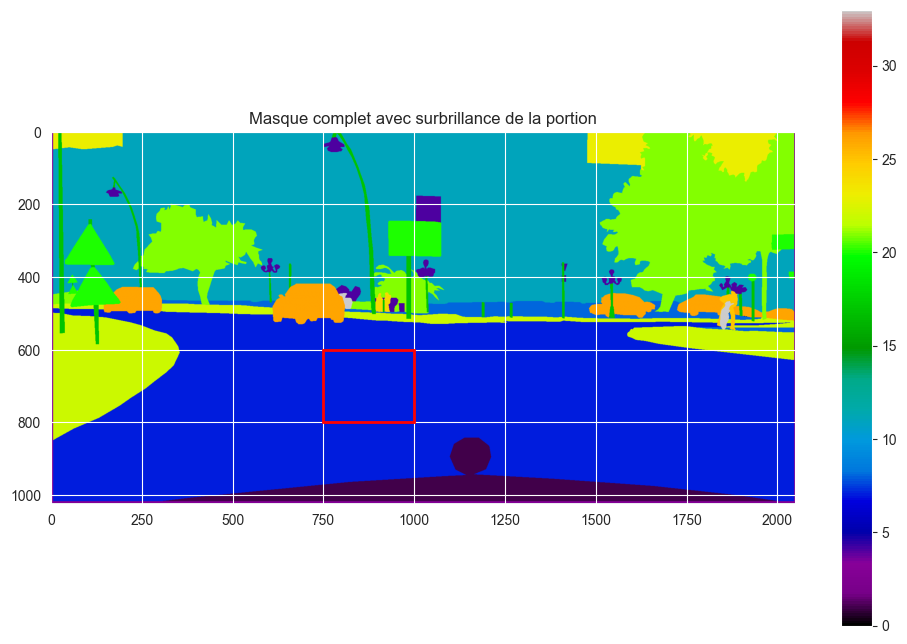

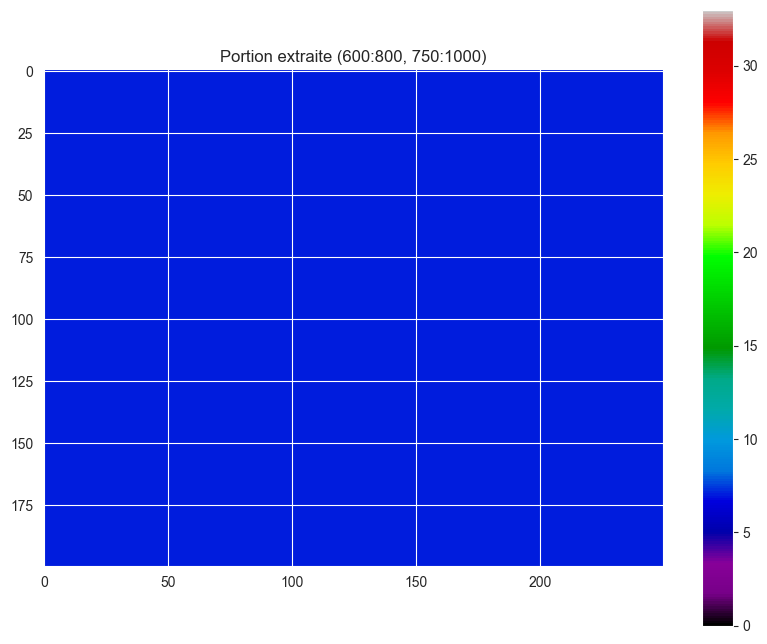

In [13]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Chemin vers le dossier gtFine
gtFine_path = 'data/gtFine/'  # Dossier principal
image_subfolder = 'train/aachen'  # Sous-dossier
image_name = 'aachen_000000_000019_gtFine_labelIds.png'  # Nom exact de l'image

# Construire le chemin complet vers l'image
image_path = f"{gtFine_path}{image_subfolder}/{image_name}"

# Charger l'image
mask = np.array(Image.open(image_path))  # Convertir l'image en une matrice numpy

# Afficher la taille de l'image
print("Shape du masque :", mask.shape)

# Afficher les valeurs uniques dans le masque (identifiants des classes présentes)
print("Valeurs uniques dans le masque :", np.unique(mask))

# Définir la portion du masque à visualiser
start_row, end_row = 600, 800  # Ordonnées sélectionnées
start_col, end_col = 750, 1000  # Abscisses sélectionnées
portion = mask[start_row:end_row, start_col:end_col]

# Afficher la portion extraite
print(f"Portion du masque ({end_row-start_row}x{end_col-start_col}) :\n", portion)

# Définir les limites de la palette (valeurs minimales et maximales de l'image complète)
vmin, vmax = mask.min(), mask.max()

# Visualiser le masque complet avec surbrillance de la portion
plt.figure(figsize=(12, 8))
plt.imshow(mask, cmap="nipy_spectral", vmin=vmin, vmax=vmax)  # Applique une palette fixe
plt.colorbar()
plt.title("Masque complet avec surbrillance de la portion")

# Ajouter un rectangle pour la portion sélectionnée
plt.gca().add_patch(plt.Rectangle((start_col, start_row), end_col-start_col, end_row-start_row, 
                                   edgecolor='red', facecolor='none', lw=2))  # Rectangle rouge
plt.show()

# Visualiser uniquement la portion extraite avec la même palette
plt.figure(figsize=(10, 8))
plt.imshow(portion, cmap="nipy_spectral", vmin=vmin, vmax=vmax)  # Applique la même échelle que l'image complète
plt.colorbar()
plt.title(f"Portion extraite ({start_row}:{end_row}, {start_col}:{end_col})")
plt.show()


#### Observations

#### Shape du masque
- La résolution de l'image est **(1024, 2048)**.
- Chaque pixel du masque correspond à une valeur unique représentant une **classe d'objets** dans l'image.

---

#### Valeurs uniques dans le masque
- Les valeurs uniques dans le masque correspondent aux **identifiants des classes** de segmentation.
- Ces valeurs permettent d'assigner une catégorie à chaque pixel, comme "route", "ciel", "bâtiment", etc.

Dans cette image, les valeurs observées sont :
- `7` : **Route** (Classe `Road`).
- `21` : **Végétation** (Classe `Vegetation`).
- `23` : **Ciel** (Classe `Sky`).
- `3` : **Mur/Bâtiment** (Classe `Building/Wall`).

---

#### Interprétation visuelle
L'image ci-dessus affiche le masque à l'aide d'une palette de couleurs distinctes. Voici les principales observations :

1. **Masque complet :**
   - La portion encadrée en **rouge** correspond à une zone où la route est bien visible.
   - Les zones environnantes incluent de la **végétation**, du **ciel**, et d'autres objets.

2. **Portion extraite :**
   - La portion (délimitée par les coordonnées 600:800 en ordonnée et 750:1000 en abscisse) contient exclusivement la classe **Route**.
   - Cela se reflète par la valeur `7` sur tous les pixels de la portion extraite.

---

#### Correspondance des classes dans l'image

| **Valeur (ID)** | **Classe**        | **Description**          |
|------------------|-------------------|--------------------------|
| 7                | Road              | Route                   |
| 21               | Vegetation        | Végétation              |
| 23               | Sky               | Ciel                    |
| 3                | Building/Wall     | Bâtiment ou Mur          |

---

#### Comparaison entre masque complet et portion extraite
- Dans le **masque complet**, la palette de couleurs permet de distinguer toutes les classes (par exemple, ciel, végétation, route).
- Dans la **portion extraite**, la valeur `7` est prédominante, correspondant uniquement à la classe "Route".
- La cohérence des couleurs entre le masque complet et la portion est assurée grâce à une échelle fixe (`vmin` et `vmax`).


#### **Correspondance des classes de segmentation**
- Ces informations sont tirées de la documentation officielle de Cityscapes. Les identifiants sont utilisés dans les fichiers `*_labelIds.png` pour représenter les classes de segmentation.

| **Classe (EN)**       | **Classe (FR)**       | **ID** | **TrainID** | **Catégorie**     | **CatID** | **HasInstances** | **IgnoreInEval** | **Couleur (RGB)** | **Couleur (description)**      |
|------------------------|-----------------------|--------|-------------|-------------------|-----------|------------------|------------------|-------------------|--------------------------------|
| unlabeled             | Non étiqueté         | 0      | 255         | void              | 0         | False            | True             | (0, 0, 0)         | Noir                           |
| ego vehicle           | Véhicule propre      | 1      | 255         | void              | 0         | False            | True             | (0, 0, 0)         | Noir                           |
| rectification border  | Bord rectifié        | 2      | 255         | void              | 0         | False            | True             | (0, 0, 0)         | Noir                           |
| out of roi            | Hors région d'intérêt| 3      | 255         | void              | 0         | False            | True             | (0, 0, 0)         | Noir                           |
| static                | Statique            | 4      | 255         | void              | 0         | False            | True             | (0, 0, 0)         | Noir                           |
| dynamic               | Dynamique           | 5      | 255         | void              | 0         | False            | True             | (111, 74, 0)      | Marron foncé                   |
| ground                | Sol                 | 6      | 255         | void              | 0         | False            | True             | (81, 0, 81)       | Violet foncé                   |
| road                  | Route               | 7      | 0           | flat              | 1         | False            | False            | (128, 64, 128)    | Violet                         |
| sidewalk              | Trottoir            | 8      | 1           | flat              | 1         | False            | False            | (244, 35, 232)    | Rose                           |
| parking               | Parking             | 9      | 255         | flat              | 1         | False            | True             | (250, 170, 160)   | Rose pâle                      |
| rail track            | Rail                | 10     | 255         | flat              | 1         | False            | True             | (230, 150, 140)   | Rouge clair                    |
| building              | Bâtiment            | 11     | 2           | construction      | 2         | False            | False            | (70, 70, 70)      | Gris                           |
| wall                  | Mur                 | 12     | 3           | construction      | 2         | False            | False            | (102, 102, 156)   | Gris-bleu                      |
| fence                 | Clôture             | 13     | 4           | construction      | 2         | False            | False            | (190, 153, 153)   | Gris clair                     |
| guard rail            | Garde-corps         | 14     | 255         | construction      | 2         | False            | True             | (180, 165, 180)   | Mauve                          |
| bridge                | Pont                | 15     | 255         | construction      | 2         | False            | True             | (150, 100, 100)   | Marron                         |
| tunnel                | Tunnel              | 16     | 255         | construction      | 2         | False            | True             | (150, 120, 90)    | Beige                          |
| pole                  | Poteau              | 17     | 5           | object            | 3         | False            | False            | (153, 153, 153)   | Gris clair                     |
| polegroup             | Groupe de poteaux   | 18     | 255         | object            | 3         | False            | True             | (153, 153, 153)   | Gris clair                     |
| traffic light         | Feu de signalisation| 19     | 6           | object            | 3         | False            | False            | (250, 170, 30)    | Orange                         |
| traffic sign          | Panneau de signal.  | 20     | 7           | object            | 3         | False            | False            | (220, 220, 0)     | Jaune                          |
| vegetation            | Végétation          | 21     | 8           | nature            | 4         | False            | False            | (107, 142, 35)    | Vert foncé                     |
| terrain               | Terrain             | 22     | 9           | nature            | 4         | False            | False            | (152, 251, 152)   | Vert clair                     |
| sky                   | Ciel                | 23     | 10          | sky               | 5         | False            | False            | (70, 130, 180)    | Bleu ciel                      |
| person                | Personne            | 24     | 11          | human             | 6         | True             | False            | (220, 20, 60)     | Rouge                          |
| rider                 | Cycliste/Motard     | 25     | 12          | human             | 6         | True             | False            | (255, 0, 0)       | Rouge vif                      |
| car                   | Voiture             | 26     | 13          | vehicle           | 7         | True             | False            | (0, 0, 142)       | Bleu foncé                     |
| truck                 | Camion              | 27     | 14          | vehicle           | 7         | True             | False            | (0, 0, 70)        | Bleu très foncé                |
| bus                   | Bus                 | 28     | 15          | vehicle           | 7         | True             | False            | (0, 60, 100)      | Bleu-vert foncé                |
| caravan               | Caravane            | 29     | 255         | vehicle           | 7         | True             | True             | (0, 0, 90)        | Bleu nuit                      |
| trailer               | Remorque            | 30     | 255         | vehicle           | 7         | True             | True             | (0, 0, 110)       | Bleu acier                     |
| train                 | Train               | 31     | 16          | vehicle           | 7         | True             | False            | (0, 80, 100)      | Turquoise foncé                |
| motorcycle            | Moto                | 32     | 17          | vehicle           | 7         | True             | False            | (0, 0, 230)       | Bleu vif                       |
| bicycle               | Vélo                | 33     | 18          | vehicle           | 7         | True             | False            | (119, 11, 32)     | Rouge sombre                   |
| license plate         | Plaque d'immatric. | -1     | -1          | vehicle           | 7         | False            | True             | (0, 0, 142)       | Bleu foncé                     |

---

#### **Regroupement en 8 catégories principales**

```python
cats = {
    'void': [0, 1, 2, 3, 4, 5, 6],
    'flat': [7, 8, 9, 10],
    'construction': [11, 12, 13, 14, 15, 16],
    'object': [17, 18, 19, 20],
    'nature': [21, 22],
    'sky': [23],
    'human': [24, 25],
    'vehicle': [26, 27, 28, 29, 30, 31, 32, 33, -1]
}


In [31]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import torch
from keras import backend as K
from keras.layers import Input, Conv2D, MaxPooling2D, concatenate, UpSampling2D, Dropout
from keras.optimizers import Adam
from keras.models import Model
from keras.preprocessing import image
from keras.utils import Sequence
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint
import cv2
import tqdm
from sklearn.metrics import accuracy_score, jaccard_score

## 2. Préparation des données avec Générateurs de Batches

- Dans cette cellule, nous chargeons les images RGB d'origine ainsi que les masques de segmentation à partir des dossiers `train`, `val` et `test` déjà préparés. Les images sont redimensionnées à une taille plus petite (256×256) pour rendre l'entraînement plus efficace, puis normalisées.

- Le jeu de données est composé de **2 dossiers** :
  - **leftImg8bit** : contient les images RGB d’origine (les données d’entrée).
  - **gtFine** : contient les masques de segmentation (les données de sortie).

- Concernant les données de sortie, il existe plusieurs types de fichiers, mais nous ne nous intéresserons qu’à ceux dont le nom se termine par **`_labelIds.png`**. Ces derniers correspondent précisément aux masques associés aux images RGB.


In [14]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import Sequence
from tensorflow.keras.preprocessing import image

# Définition des chemins en se basant sur le dossier courant (cwd)
base_dir = os.path.join(os.getcwd(), 'data')
image_dir_train = os.path.join(base_dir, 'leftImg8bit/train')
mask_dir_train = os.path.join(base_dir, 'gtFine/train')
image_dir_val = os.path.join(base_dir, 'leftImg8bit/val')
mask_dir_val = os.path.join(base_dir, 'gtFine/val')
image_dir_test = os.path.join(base_dir, 'leftImg8bit/test')
mask_dir_test = os.path.join(base_dir, 'gtFine/test')

class DataGenerator(Sequence):
    """
    Générateur de données personnalisé (Keras Sequence)
    pour charger des images et leurs masques (segmentation).
    """
    def __init__(self, image_dir, mask_dir, batch_size=16, img_size=(256, 256)):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.batch_size = batch_size
        self.img_size = img_size
        self.image_list = []

        # Récupération de toutes les images .jpg / .jpeg / .png
        for root, _, files in os.walk(self.image_dir):
            for file in files:
                if file.endswith(('.jpg', '.jpeg', '.png')):
                    self.image_list.append(os.path.join(root, file))

        # Récupération des masques (_labelIds.png)
        self.mask_list = []
        for root, _, files in os.walk(self.mask_dir):
            for file in files:
                if file.endswith('_labelIds.png'):
                    self.mask_list.append(os.path.join(root, file))

        # Tri pour garantir la correspondance image <-> masque
        self.image_list.sort()
        self.mask_list.sort()

        # Index pour pouvoir mélanger ou itérer
        self.indexes = np.arange(len(self.image_list))

    def __len__(self):
        """
        Retourne le nombre de batchs par epoch.
        """
        return len(self.image_list) // self.batch_size

    def __getitem__(self, index):
        """
        Charge et renvoie un batch (images, masques) à l'index donné.
        """
        batch_indexes = self.indexes[index * self.batch_size : (index + 1) * self.batch_size]
        images, masks = [], []

        for i in batch_indexes:
            img_path = self.image_list[i]
            mask_path = self.mask_list[i]

            # Chargement + redimensionnement de l'image
            img = image.load_img(img_path, target_size=self.img_size)
            img = image.img_to_array(img) / 255.0

            # Chargement + redimensionnement du masque en mode niveau de gris
            mask = image.load_img(mask_path, color_mode="grayscale", target_size=self.img_size)
            mask = image.img_to_array(mask) / 255.0

            images.append(img)
            masks.append(mask)

        return np.array(images), np.array(masks)

# Exemple d'utilisation du DataGenerator
batch_size = 16
train_gen = DataGenerator(image_dir_train, mask_dir_train, batch_size=batch_size)
val_gen = DataGenerator(image_dir_val, mask_dir_val, batch_size=batch_size)
test_gen = DataGenerator(image_dir_test, mask_dir_test, batch_size=batch_size)

# Vérification du backend
print(f"Keras utilise le backend TensorFlow : {tf.keras.backend.backend() == 'tensorflow'}")

# Optionnel: on peut également vérifier le nombre de batchs
print("Nombre de batchs (train) :", len(train_gen))
print("Nombre de batchs (val)   :", len(val_gen))
print("Nombre de batchs (test)  :", len(test_gen))


Keras utilise le backend TensorFlow : True
Nombre de batchs (train) : 185
Nombre de batchs (val)   : 31
Nombre de batchs (test)  : 95


In [15]:
print(f"Nombre d'images dans le dossier d'entraînement : {len(train_gen.image_list)}")
print(f"Nombre de masques dans le dossier d'entraînement : {len(train_gen.mask_list)}")


Nombre d'images dans le dossier d'entraînement : 2975
Nombre de masques dans le dossier d'entraînement : 2975


In [16]:
for images, masks in train_gen:
    print(images.shape, masks.shape)
    break


(16, 256, 256, 3) (16, 256, 256, 1)


## **3. Développement et entraînement du modèle U-Net:**

## Utiliser Keras pour le DataGenerator et PyTorch pour entraîner un U-Net complet (pas la version “mini”)

**Contexte :**  
- Future Vision Transport impose **Keras** comme framework de référence pour le pipeline (chargement, normalisation, etc.) afin d’assurer la compatibilité avec le reste de l’équipe (Franck et Laura).  
- Or, **TensorFlow ≥ 2.10** sous Windows ne prend plus en charge le GPU localement (sauf builds spécifiques). Par ailleurs, après tests, la nouvelle version de keras avec tensorflow en backend ne fonctionne pas correctement sur Windows.
- Je souhaite **accélérer l’entraînement** via le GPU, ce que **PyTorch** gère très bien sur Windows.  
- **Après coup**, différents modèles seront comparés : U-Net classique, VGG16-UNet et U-Net Mini. Ici, on se concentre sur un U-Net **complet**, pas la version mini.

**Solution :**  
1. **Keras** fournit la classe `Sequence` pour gérer le chargement des données (images + masques).  
2. **PyTorch** est utilisé pour définir et entraîner le U-Net complet sur le GPU.  
3. **Le DataGenerator Keras** renvoie des `np.array` → **Convertis en `torch.Tensor`** pour l’entraînement.

Ainsi, on respecte la contrainte de l’équipe (Keras comme point d’entrée) et on contourne la limitation de TensorFlow sur Windows en tirant parti de **PyTorch** pour l’apprentissage GPU.  

### Étapes

- **Partie 1** : DataGenerator (Keras)  
- **Partie 2** : U-Net complet en PyTorch  
- **Partie 3** : Boucle d’entraînement PyTorch, en récupérant les données depuis le DataGenerator Keras.  

Ultérieurement on **remplacera le U-Net** par VGG16-UNet ou U-Net Mini, tout en conservant la même logique DataGenerator Keras + PyTorch.  

In [ ]:
import os
import numpy as np
from keras.utils import Sequence
from keras.preprocessing import image
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Limitation mémoire GPU
if torch.cuda.is_available():
    os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"
    torch.cuda.set_per_process_memory_fraction(0.5, 0)

# Générateur de données
class DataGenerator(Sequence):
    def __init__(self, image_dir, mask_dir, batch_size=2, img_size=(32, 32)):  # Batch et taille d'image réduits
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.batch_size = batch_size
        self.img_size = img_size
        self.image_list = []
        for root, _, files in os.walk(image_dir):
            for file in files:
                if file.endswith(('.jpg', '.jpeg', '.png')):
                    self.image_list.append(os.path.join(root, file))

        self.mask_list = []
        for root, _, files in os.walk(mask_dir):
            for file in files:
                if file.endswith('_labelIds.png'):
                    self.mask_list.append(os.path.join(root, file))

        self.image_list.sort()
        self.mask_list.sort()
        self.indexes = np.arange(len(self.image_list))

    def __len__(self):
        return len(self.image_list) // self.batch_size

    def __getitem__(self, index):
        batch_indexes = self.indexes[index * self.batch_size:(index + 1) * self.batch_size]
        images, masks = [], []

        for i in batch_indexes:
            img_path = self.image_list[i]
            mask_path = self.mask_list[i]
            img = image.load_img(img_path, target_size=self.img_size)
            img = image.img_to_array(img) / 255.0
            mask = image.load_img(mask_path, color_mode="grayscale", target_size=self.img_size)
            mask = image.img_to_array(mask) / 255.0

            images.append(img)
            masks.append(mask)

        return np.array(images, dtype='float32'), np.array(masks, dtype='float32')

# Chargement des données
base_dir = os.path.join(os.getcwd(), 'data')
image_dir_train = os.path.join(base_dir, 'leftImg8bit/train')
mask_dir_train = os.path.join(base_dir, 'gtFine/train')
image_dir_val = os.path.join(base_dir, 'leftImg8bit/val')
mask_dir_val = os.path.join(base_dir, 'gtFine/val')

train_gen = DataGenerator(image_dir_train, mask_dir_train, batch_size=2, img_size=(32


In [13]:
# # Définition du modèle U-Net
# def unet_model(input_size=(256, 256, 3)):
#     inputs = Input(input_size)
#     c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
#     p1 = MaxPooling2D((2, 2))(c1)
# 
#     c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
#     p2 = MaxPooling2D((2, 2))(c2)
# 
#     # Partie à la descente
#     c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
# 
#     # Partie remontante
#     u4 = UpSampling2D((2, 2))(c3)
#     u4 = concatenate([u4, c2])
#     c4 = Conv2D(128, (3, 3), activation='relu', padding='same')(u4)
# 
#     u5 = UpSampling2D((2, 2))(c4)
#     u5 = concatenate([u5, c1])
#     c5 = Conv2D(64, (3, 3), activation='relu', padding='same')(u5)
# 
#     outputs = Conv2D(1, (1, 1), activation='sigmoid')(c5)
#     model = Model(inputs=[inputs], outputs=[outputs])
#     
#     return model
# 
# # Compilation du modèle
# model = unet_model()
# model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
# 
# # Early stopping et sauvegarde du meilleur modèle
# early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
# model_checkpoint = ModelCheckpoint(os.path.join('models', 'unet_best_model.h5'), save_best_only=True, monitor='val_loss')
# 
# # Entraînement avec le générateur de données
# def train_unet_on_gpu():
#     with torch.device('/GPU:0'):  # Spécifie l'utilisation du GPU
#         model.fit(train_gen, validation_data=val_gen, epochs=10, callbacks=[early_stopping, model_checkpoint])
#         
# # Appel de la fonction pour entraîner le modèle U-Net
# train_unet_on_gpu()
# 
# 
#         

ValueError: The filepath provided must end in `.keras` (Keras model format). Received: filepath=models\unet_best_model.h5

In [44]:
# import torch
# from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
# from keras.mixed_precision import Policy, set_policy
# 
# # Activer le mixed precision training (si le GPU le supporte)
# set_policy(Policy('mixed_float16'))
# 
# # Limiter l'allocation mémoire GPU
# gpus = torch.config.list_physical_devices('GPU')
# if gpus:
#     try:
#         for gpu in gpus:
#             torch.config.experimental.set_memory_growth(gpu, True)
#     except RuntimeError as e:
#         print(e)
# 
# # Définition du modèle U-Net (exemple simplifié)
# def unet_model(input_size=(128, 128, 3)):
#     inputs = torch.keras.layers.Input(input_size)
#     conv1 = torch.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
#     pool1 = torch.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv1)
#     conv2 = torch.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(pool1)
#     up1 = torch.keras.layers.UpSampling2D(size=(2, 2))(conv2)
#     outputs = torch.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(up1)
#     model = torch.keras.Model(inputs, outputs)
#     return model
# 
# # Créer le modèle
# model = unet_model(input_size=(128, 128, 3))  # Réduction de la taille des images
# 
# # Compiler le modèle
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# 
# # Assurez-vous que `train_gen` et `val_gen` sont bien définis (exemple avec ImageDataGenerator)
# from keras.preprocessing.image import ImageDataGenerator
# 
# # Créez des générateurs de données comme exemple
# datagen = ImageDataGenerator(rescale=1./255)
# train_gen = datagen.flow_from_directory('path_to_train_data', target_size=(128, 128), batch_size=4, class_mode='binary')
# val_gen = datagen.flow_from_directory('path_to_val_data', target_size=(128, 128), batch_size=4, class_mode='binary')
# 
# # Définir les callbacks
# callbacks = [
#     ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, mode='min'),
#     ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6),
#     EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# ]
# 
# # Entraîner le modèle
# history = model.fit(
#     train_gen,
#     steps_per_epoch=len(train_gen),
#     validation_data=val_gen,
#     validation_steps=len(val_gen),
#     epochs=50,
#     callbacks=callbacks
# )
# 
# # Sauvegarder le modèle final
# model.save('final_model.h5')


ImportError: cannot import name 'set_policy' from 'tensorflow.keras.mixed_precision' (/home/pat/miniconda3/envs/oc_ia_p8wsl2_tf10/lib/python3.10/site-packages/keras/api/_v2/keras/mixed_precision/__init__.py)

In [26]:
# # Fonction pour construire le modèle U-Net
# def unet_model(input_size=(256, 256, 3)):
#     inputs = Input(input_size)
#     c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
#     p1 = MaxPooling2D((2, 2))(c1)
# 
#     c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
#     p2 = MaxPooling2D((2, 2))(c2)
# 
#     # Partie à la descente
#     c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
# 
#     # Partie remontante
#     u4 = UpSampling2D((2, 2))(c3)
#     u4 = concatenate([u4, c2])
#     c4 = Conv2D(128, (3, 3), activation='relu', padding='same')(u4)
# 
#     u5 = UpSampling2D((2, 2))(c4)
#     u5 = concatenate([u5, c1])
#     c5 = Conv2D(64, (3, 3), activation='relu', padding='same')(u5)
# 
#     outputs = Conv2D(1, (1, 1), activation='sigmoid')(c5)
#     model = Model(inputs=[inputs], outputs=[outputs])
#     
#     return model
# 
# # Compilation du modèle
# model = unet_model()
# model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
# 
# # Early stopping et sauvegarde du meilleur modèle
# early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
# model_checkpoint = ModelCheckpoint(os.path.join('models', 'unet_best_model.h5'), save_best_only=True, monitor='val_loss')
# 
# # Entraînement avec le générateur de données
# def train_unet_on_gpu():
#     with torch.device('/GPU:0'):  # Spécifie l'utilisation du GPU
#         model.fit(train_gen, validation_data=val_gen, epochs=10, callbacks=[early_stopping, model_checkpoint])
#         
# # Appel de la fonction pour entraîner le modèle U-Net
# train_unet_on_gpu()


Epoch 1/10


2024-12-07 11:09:56.535496: W tensorflow/core/common_runtime/bfc_allocator.cc:479] Allocator (GPU_0_bfc) ran out of memory trying to allocate 768.00MiB (rounded to 805306368)requested by op model_8/concatenate_13/concat
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2024-12-07 11:09:56.535551: I tensorflow/core/common_runtime/bfc_allocator.cc:1033] BFCAllocator dump for GPU_0_bfc
2024-12-07 11:09:56.535561: I tensorflow/core/common_runtime/bfc_allocator.cc:1040] Bin (256): 	Total Chunks: 125, Chunks in use: 124. 31.2KiB allocated for chunks. 31.0KiB in use in bin. 8.0KiB client-requested in use in bin.
2024-12-07 11:09:56.535566: I tensorflow/core/common_runtime/bfc_allocator.cc:1040] Bin (512): 	Total Chunks: 18, Chunks in use: 18. 9.5KiB allocated for chunks. 9.5KiB in use in bin. 9.0KiB client-requested in use in bin.
2024-12-

ResourceExhaustedError: Graph execution error:

Detected at node 'model_8/concatenate_13/concat' defined at (most recent call last):
    File "/home/pat/miniconda3/envs/oc_ia_p8wsl2_tf10/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/home/pat/miniconda3/envs/oc_ia_p8wsl2_tf10/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/home/pat/miniconda3/envs/oc_ia_p8wsl2_tf10/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>
      app.launch_new_instance()
    File "/home/pat/miniconda3/envs/oc_ia_p8wsl2_tf10/lib/python3.10/site-packages/traitlets/config/application.py", line 1075, in launch_instance
      app.start()
    File "/home/pat/miniconda3/envs/oc_ia_p8wsl2_tf10/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 739, in start
      self.io_loop.start()
    File "/home/pat/miniconda3/envs/oc_ia_p8wsl2_tf10/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 205, in start
      self.asyncio_loop.run_forever()
    File "/home/pat/miniconda3/envs/oc_ia_p8wsl2_tf10/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/home/pat/miniconda3/envs/oc_ia_p8wsl2_tf10/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once
      handle._run()
    File "/home/pat/miniconda3/envs/oc_ia_p8wsl2_tf10/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/pat/miniconda3/envs/oc_ia_p8wsl2_tf10/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue
      await self.process_one()
    File "/home/pat/miniconda3/envs/oc_ia_p8wsl2_tf10/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 534, in process_one
      await dispatch(*args)
    File "/home/pat/miniconda3/envs/oc_ia_p8wsl2_tf10/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell
      await result
    File "/home/pat/miniconda3/envs/oc_ia_p8wsl2_tf10/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 362, in execute_request
      await super().execute_request(stream, ident, parent)
    File "/home/pat/miniconda3/envs/oc_ia_p8wsl2_tf10/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 778, in execute_request
      reply_content = await reply_content
    File "/home/pat/miniconda3/envs/oc_ia_p8wsl2_tf10/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 449, in do_execute
      res = shell.run_cell(
    File "/home/pat/miniconda3/envs/oc_ia_p8wsl2_tf10/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 549, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/pat/miniconda3/envs/oc_ia_p8wsl2_tf10/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3075, in run_cell
      result = self._run_cell(
    File "/home/pat/miniconda3/envs/oc_ia_p8wsl2_tf10/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3130, in _run_cell
      result = runner(coro)
    File "/home/pat/miniconda3/envs/oc_ia_p8wsl2_tf10/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner
      coro.send(None)
    File "/home/pat/miniconda3/envs/oc_ia_p8wsl2_tf10/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3334, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/pat/miniconda3/envs/oc_ia_p8wsl2_tf10/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3517, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/pat/miniconda3/envs/oc_ia_p8wsl2_tf10/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_3279/322275931.py", line 41, in <module>
      train_unet_on_gpu()
    File "/tmp/ipykernel_3279/322275931.py", line 38, in train_unet_on_gpu
      model.fit(train_gen, validation_data=val_gen, epochs=10, callbacks=[early_stopping, model_checkpoint])
    File "/home/pat/miniconda3/envs/oc_ia_p8wsl2_tf10/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/pat/miniconda3/envs/oc_ia_p8wsl2_tf10/lib/python3.10/site-packages/keras/engine/training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "/home/pat/miniconda3/envs/oc_ia_p8wsl2_tf10/lib/python3.10/site-packages/keras/engine/training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "/home/pat/miniconda3/envs/oc_ia_p8wsl2_tf10/lib/python3.10/site-packages/keras/engine/training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/pat/miniconda3/envs/oc_ia_p8wsl2_tf10/lib/python3.10/site-packages/keras/engine/training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "/home/pat/miniconda3/envs/oc_ia_p8wsl2_tf10/lib/python3.10/site-packages/keras/engine/training.py", line 993, in train_step
      y_pred = self(x, training=True)
    File "/home/pat/miniconda3/envs/oc_ia_p8wsl2_tf10/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/pat/miniconda3/envs/oc_ia_p8wsl2_tf10/lib/python3.10/site-packages/keras/engine/training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "/home/pat/miniconda3/envs/oc_ia_p8wsl2_tf10/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/pat/miniconda3/envs/oc_ia_p8wsl2_tf10/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/pat/miniconda3/envs/oc_ia_p8wsl2_tf10/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/pat/miniconda3/envs/oc_ia_p8wsl2_tf10/lib/python3.10/site-packages/keras/engine/functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/home/pat/miniconda3/envs/oc_ia_p8wsl2_tf10/lib/python3.10/site-packages/keras/engine/functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/home/pat/miniconda3/envs/oc_ia_p8wsl2_tf10/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/pat/miniconda3/envs/oc_ia_p8wsl2_tf10/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/pat/miniconda3/envs/oc_ia_p8wsl2_tf10/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/pat/miniconda3/envs/oc_ia_p8wsl2_tf10/lib/python3.10/site-packages/keras/layers/merging/base_merge.py", line 196, in call
      return self._merge_function(inputs)
    File "/home/pat/miniconda3/envs/oc_ia_p8wsl2_tf10/lib/python3.10/site-packages/keras/layers/merging/concatenate.py", line 134, in _merge_function
      return backend.concatenate(inputs, axis=self.axis)
    File "/home/pat/miniconda3/envs/oc_ia_p8wsl2_tf10/lib/python3.10/site-packages/keras/backend.py", line 3572, in concatenate
      return tf.concat([to_dense(x) for x in tensors], axis)
Node: 'model_8/concatenate_13/concat'
OOM when allocating tensor with shape[16,192,256,256] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node model_8/concatenate_13/concat}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_8092]

## **4.  Comparaison des Modèles U-Net, VGG16-UNET, et U-Net Mini**

**Explication :** Ici, nous avons ajouté un modèle U-Net Mini, qui est une version plus légère et simplifiée du U-Net. Le modèle VGG16-UNET a été mis à jour pour inclure une couche de data augmentation interne afin de mieux généraliser les performances.


In [16]:
# Importation des bibliothèques nécessaires
from keras.applications import VGG16
from keras.layers import RandomFlip, RandomRotation, RandomZoom

# Développement du modèle VGG16-UNET
def vgg16_unet_model(input_size=(256, 256, 3)):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_size)
    
    # Data augmentation intégrée
    inputs = Input(input_size)
    x = RandomFlip("horizontal")(inputs)
    x = RandomRotation(0.2)(x)
    x = RandomZoom(0.2)(x)
    
    # Passage de l'entrée dans le modèle VGG16
    block1_conv2 = base_model.get_layer('block1_conv2').output
    block2_conv2 = base_model.get_layer('block2_conv2').output
    block3_conv3 = base_model.get_layer('block3_conv3').output
    vgg_outputs = [block1_conv2, block2_conv2, block3_conv3]
    
    # Définir un nouveau modèle avec les sorties intermédiaires désirées
    vgg16_encoder = Model(inputs=base_model.input, outputs=vgg_outputs)
    
    # Passer les images par l'encodeur
    c1, c2, c3 = vgg16_encoder(x)
    
    # Partie remontante du U-Net avec des couches de décodage
    u4 = UpSampling2D((2, 2))(c3)
    u4 = concatenate([u4, c2])
    c4 = Conv2D(128, (3, 3), activation='relu', padding='same')(u4)
    
    u5 = UpSampling2D((2, 2))(c4)
    u5 = concatenate([u5, c1])
    c5 = Conv2D(64, (3, 3), activation='relu', padding='same')(u5)

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c5)
    model = Model(inputs=[inputs], outputs=[outputs])
    
    return model

vgg16_model = vgg16_unet_model()
vgg16_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Entraînement du modèle VGG16-UNET avec générateur de données
vgg16_checkpoint = ModelCheckpoint(os.path.join('models', 'vgg16_best_model.h5'), save_best_only=True, monitor='val_loss')

def train_vgg16_on_gpu():
    with torch.device('/GPU:0'):  # Spécifie l'utilisation du GPU
        vgg16_model.fit(train_gen, validation_data=val_gen, epochs=10, callbacks=[early_stopping, vgg16_checkpoint])



In [17]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Définir un checkpoint pour sauvegarder le meilleur modèle
unet_mini_checkpoint = ModelCheckpoint(
    filepath='models/unet_mini_best_model.h5',  # Chemin où sauvegarder le modèle
    save_best_only=True,                       # Sauvegarder uniquement si le modèle est meilleur
    monitor='val_loss',                        # Critère de sauvegarde basé sur la perte de validation
    verbose=1                                  # Afficher les informations pendant l'entraînement
)

# Early stopping pour arrêter l'entraînement si le modèle ne s'améliore plus
early_stopping = EarlyStopping(
    patience=5,                                # Arrêter après 5 epochs sans amélioration
    restore_best_weights=True                 # Restaurer les meilleurs poids obtenus
)

# Développement du modèle U-Net Mini
def unet_mini_model(input_size=(256, 256, 3)):
    inputs = Input(input_size)
    c1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(64, (3, 3), activation='relu', padding='same')(p1)
    p2 = MaxPooling2D((2, 2))(c2)

    # Partie à la descente
    c3 = Conv2D(128, (3, 3), activation='relu', padding='same')(p2)

    # Partie remontante
    u4 = UpSampling2D((2, 2))(c3)
    u4 = concatenate([u4, c2])
    c4 = Conv2D(64, (3, 3), activation='relu', padding='same')(u4)

    u5 = UpSampling2D((2, 2))(c4)
    u5 = concatenate([u5, c1])
    c5 = Conv2D(32, (3, 3), activation='relu', padding='same')(u5)

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c5)
    model = Model(inputs=[inputs], outputs=[outputs])
    
    return model

unet_mini_model = unet_mini_model()
unet_mini_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Entraînement du modèle U-Net Mini
def train_unet_mini_on_gpu():
    with torch.device('/GPU:0'):
        unet_mini_model.fit(train_gen, validation_data=val_gen, epochs=10, callbacks=[early_stopping, unet_mini_checkpoint])

## 5. Conclusion, Comparaison et Visualisation des Modèles

** Cette cellule compare les trois modèles entraînés (U-Net classique, VGG16-UNET, et U-Net Mini) sur les métriques telles que l'accuracy, l'IoU, et le Dice Coefficient. Des graphiques sont créés pour visualiser les performances de chaque modèle. 

In [18]:
# Comparaison des performances des trois modèles
# On retient le modèle avec la meilleure précision sur l'ensemble de validation

def compare_models(models, val_gen, test_gen):
    metrics = []
    for model in models:
        model_name = model.name
        loss, accuracy = model.evaluate(val_gen, verbose=0)
        y_pred = model.predict(test_gen)
        y_pred_binary = (y_pred > 0.5).astype(np.uint8)
        y_test = np.concatenate([y for _, y in test_gen], axis=0)
        
        iou = jaccard_score(y_test.flatten(), y_pred_binary.flatten(), average='macro')
        dice = (2 * np.sum(y_test.flatten() * y_pred_binary.flatten())) / (np.sum(y_test.flatten()) + np.sum(y_pred_binary.flatten()))
        
        metrics.append({
            'model': model_name,
            'loss': loss,
            'accuracy': accuracy,
            'iou': iou,
            'dice': dice
        })
    return metrics

# Comparer les modèles
models = [model, vgg16_model, unet_mini_model]
metrics = compare_models(models, val_gen, test_gen)

2024-12-07 10:59:19.314882: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.25GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-12-07 10:59:23.862682: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.25GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-12-07 10:59:25.217952: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.25GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-12-07 10:59:26.787171: W tensorflow/core/common_runtime/bfc_allocato

72/95 [=====================>........] - ETA: 36s

2024-12-07 11:02:04.934451: W tensorflow/core/framework/op_kernel.cc:1768] UNKNOWN: IndexError: list index out of range
Traceback (most recent call last):

  File "/home/pat/miniconda3/envs/oc_ia_p8wsl2_tf10/lib/python3.10/site-packages/tensorflow/python/ops/script_ops.py", line 271, in __call__
    ret = func(*args)

  File "/home/pat/miniconda3/envs/oc_ia_p8wsl2_tf10/lib/python3.10/site-packages/tensorflow/python/autograph/impl/api.py", line 642, in wrapper
    return func(*args, **kwargs)

  File "/home/pat/miniconda3/envs/oc_ia_p8wsl2_tf10/lib/python3.10/site-packages/tensorflow/python/data/ops/dataset_ops.py", line 1035, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "/home/pat/miniconda3/envs/oc_ia_p8wsl2_tf10/lib/python3.10/site-packages/keras/engine/data_adapter.py", line 903, in wrapped_generator
    for data in generator_fn():

  File "/home/pat/miniconda3/envs/oc_ia_p8wsl2_tf10/lib/python3.10/site-packages/keras/engine/data_adapter.

UnknownError: Graph execution error:

2 root error(s) found.
  (0) UNKNOWN:  IndexError: list index out of range
Traceback (most recent call last):

  File "/home/pat/miniconda3/envs/oc_ia_p8wsl2_tf10/lib/python3.10/site-packages/tensorflow/python/ops/script_ops.py", line 271, in __call__
    ret = func(*args)

  File "/home/pat/miniconda3/envs/oc_ia_p8wsl2_tf10/lib/python3.10/site-packages/tensorflow/python/autograph/impl/api.py", line 642, in wrapper
    return func(*args, **kwargs)

  File "/home/pat/miniconda3/envs/oc_ia_p8wsl2_tf10/lib/python3.10/site-packages/tensorflow/python/data/ops/dataset_ops.py", line 1035, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "/home/pat/miniconda3/envs/oc_ia_p8wsl2_tf10/lib/python3.10/site-packages/keras/engine/data_adapter.py", line 903, in wrapped_generator
    for data in generator_fn():

  File "/home/pat/miniconda3/envs/oc_ia_p8wsl2_tf10/lib/python3.10/site-packages/keras/engine/data_adapter.py", line 1050, in generator_fn
    yield x[i]

  File "/tmp/ipykernel_3279/3080680293.py", line 53, in __getitem__
    mask_path = self.mask_list[i]

IndexError: list index out of range


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]]
	 [[IteratorGetNext/_2]]
  (1) UNKNOWN:  IndexError: list index out of range
Traceback (most recent call last):

  File "/home/pat/miniconda3/envs/oc_ia_p8wsl2_tf10/lib/python3.10/site-packages/tensorflow/python/ops/script_ops.py", line 271, in __call__
    ret = func(*args)

  File "/home/pat/miniconda3/envs/oc_ia_p8wsl2_tf10/lib/python3.10/site-packages/tensorflow/python/autograph/impl/api.py", line 642, in wrapper
    return func(*args, **kwargs)

  File "/home/pat/miniconda3/envs/oc_ia_p8wsl2_tf10/lib/python3.10/site-packages/tensorflow/python/data/ops/dataset_ops.py", line 1035, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "/home/pat/miniconda3/envs/oc_ia_p8wsl2_tf10/lib/python3.10/site-packages/keras/engine/data_adapter.py", line 903, in wrapped_generator
    for data in generator_fn():

  File "/home/pat/miniconda3/envs/oc_ia_p8wsl2_tf10/lib/python3.10/site-packages/keras/engine/data_adapter.py", line 1050, in generator_fn
    yield x[i]

  File "/tmp/ipykernel_3279/3080680293.py", line 53, in __getitem__
    mask_path = self.mask_list[i]

IndexError: list index out of range


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]]
0 successful operations.
0 derived errors ignored. [Op:__inference_predict_function_6716]

In [ ]:
# Visualisation des résultats
import pandas as pd
metrics_df = pd.DataFrame(metrics)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(metrics_df['model'], metrics_df['accuracy'], label='Accuracy', marker='o')
plt.plot(metrics_df['model'], metrics_df['iou'], label='IoU', marker='o')
plt.plot(metrics_df['model'], metrics_df['dice'], label='Dice Coefficient', marker='o')
plt.title('Comparaison des métriques entre modèles')
plt.xlabel('Modèles')
plt.ylabel('Score')
plt.legend()

plt.subplot(1, 2, 2)
plt.bar(metrics_df['model'], metrics_df['loss'], color='red')
plt.title('Loss des différents modèles')
plt.xlabel('Modèles')
plt.ylabel('Loss')
plt.show()

## Visualisation des exemples de résultats pour chaque modèle

In [ ]:
# Fonction de visualisation des prédictions

def visualize_predictions(models, test_gen, num_examples=3):
    for model in models:
        print(f"Visualisation des prédictions pour le modèle: {model.name}")
        predictions = model.predict(test_gen)
        X_test, y_test = next(iter(test_gen))
        for i in range(num_examples):
            plt.figure(figsize=(12, 4))
            plt.subplot(1, 3, 1)
            plt.imshow(X_test[i])
            plt.title("Image d'origine")
            
            plt.subplot(1, 3, 2)
            plt.imshow(y_test[i].squeeze(), cmap='gray')
            plt.title("Masque réel")
            
            plt.subplot(1, 3, 3)
            plt.imshow(predictions[i].squeeze(), cmap='gray')
            plt.title("Masque prédit")
            
            plt.show()

# Visualiser quelques exemples de segmentation
visualize_predictions(models, test_gen)